In [1]:
import pandas as pd
import numpy as np
cars = pd.read_csv('imports-85.data')
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.info()
cars.head()
cars = cars.replace('?',np.nan)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [2]:
cars.isnull().sum()
cars = cars.dropna(subset=['price'])

cars.isnull().sum()



symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [3]:
selected_columns = ['normalized-losses','wheel-base', 'length', 'width', 'height', 'curb-weight',
                   'bore','stroke','compression-rate','horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = cars[selected_columns]
cars=cars.astype(float)
cars = cars.fillna(cars.mean())

cars.isnull().sum()


normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [4]:
cars_mean = np.mean(cars,axis =0)
cars_max = np.max(cars,axis =0)
cars_min = np.min(cars,axis =0)
cars_std = np.std(cars,axis=0)
predicted_column = cars.price
cars = cars.drop(['price'],axis=1)
cars_norm = (cars-cars_min)/(cars_max-cars_min)
cars_norm['price'] = predicted_column
cars = cars_norm
cars.isnull().sum()


bore                 0
city-mpg             0
compression-rate     0
curb-weight          0
height               0
highway-mpg          0
horsepower           0
length               0
normalized-losses    0
peak-rpm             0
price                0
stroke               0
wheel-base           0
width                0
dtype: int64

In [5]:
numeric_cars = cars

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_columns, target_columns, df):
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    rand_df = df.reindex(random_index)
    training_number = round(len(rand_df)/2)
    training_data = rand_df.iloc[0:training_number]
    test_data = rand_df.iloc[training_number:]
    k_rmse ={}
    k_value = [1,3,5,7,9]
    for i in k_value:
        model = KNeighborsRegressor(n_neighbors =i)
        model.fit(training_data[[train_columns]],training_data[target_columns])
        predictions = model.predict(test_data[[train_columns]])
        mse = mean_squared_error(predictions, test_data[target_columns])
        rmse = np.sqrt(mse)
        k_rmse[i] = rmse
    return k_rmse
columns = cars.columns.drop('price')
k_rmse_result={}
for value in columns:
    print(value)
    rmse_val= knn_train_test(value,'price',cars)
    k_rmse_result[value] = rmse_val


bore
city-mpg
compression-rate
curb-weight
height
highway-mpg
horsepower
length
normalized-losses
peak-rpm
stroke
wheel-base
width


In [7]:
k_rmse_result


{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
print(k_rmse_result.values())



dict_values([{1: 4559.257297950061, 3: 4606.413692169901, 9: 4652.914172067787, 5: 4704.482589704386, 7: 4571.485046194653}, {1: 4493.734068810494, 3: 5120.161506064513, 9: 5738.405685192312, 5: 5461.553997873057, 7: 5448.1070513823315}, {1: 7846.750605148984, 3: 7500.5698123109905, 9: 7688.096096891432, 5: 7330.197653434445, 7: 7756.421586234123}, {1: 8602.58848450066, 3: 6984.239489480916, 9: 6866.808502038413, 5: 6780.627784685976, 7: 6878.097965921532}, {1: 4628.45550121557, 3: 5129.8358210721635, 9: 5383.054514833446, 5: 5427.2009608367125, 7: 5313.427720847974}, {1: 9511.480067750124, 3: 8537.550899973421, 9: 7340.041341263401, 5: 7697.4596964334805, 7: 7510.294160083481}, {1: 5901.143574354764, 3: 4646.746408727155, 9: 5465.209492527533, 5: 4766.422505090134, 7: 5232.523034167316}, {1: 4170.054848037801, 3: 4020.8492630885394, 9: 4515.135617419103, 5: 4037.0377131537603, 7: 4353.811860277134}, {1: 6025.594966720739, 3: 4617.305019788554, 9: 5278.358056953987, 5: 4630.02679858805

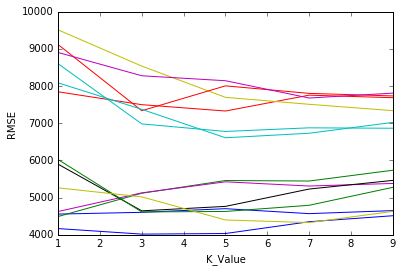

In [9]:
for k, value in k_rmse_result.items():
  
    x= sorted(value.keys())
    y=[]
   
    for i in x:       
        y_corresponse = value.get(i)
        y.append(y_corresponse)
    plt.plot(x,y)
    plt.xlabel('K_Value')
    plt.ylabel("RMSE")
  

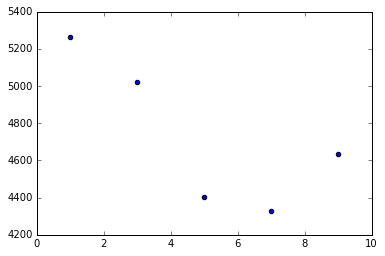

In [10]:
plt.scatter(x,y)

In [11]:
feature_avg_rmse = {}
for k, value in k_rmse_result.items():
    avg_rmse = np.mean(list(value.values()))
    feature_avg_rmse[k] = avg_rmse
feature_avg_rmse = pd.Series(feature_avg_rmse)
feature_avg_rmse.sort_values()


horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [12]:
 k_rmse_result


{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

In [13]:
def knn_train_test(train_columns, target_columns, df):
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    rand_df = df.reindex(random_index)
    training_number = round(len(rand_df)/2)
    training_data = rand_df.iloc[0:training_number]
    test_data = rand_df.iloc[training_number:]
    model = KNeighborsRegressor(n_neighbors =5)
    model.fit(training_data[train_columns],training_data[target_columns])
    predictions = model.predict(test_data[train_columns])
    mse = mean_squared_error(predictions, test_data[target_columns])
    rmse = np.sqrt(mse)
    return rmse
k_rmse ={}
two_best_feature = ['horsepower','width']
rmse_val = knn_train_test(two_best_feature, 'price',cars)
k_rmse['two_best_feature'] = rmse_val
three_best_feature = ['horsepower','width','curb-weight']
rmse_val = knn_train_test(three_best_feature, 'price',cars)
k_rmse['three_best_feature'] = rmse_val
four_best_feature = ['horsepower','width','curb-weight','highway-mpg']
rmse_val = knn_train_test(four_best_feature, 'price',cars)
k_rmse['four_best_feature'] = rmse_val
five_best_feature = ['horsepower','width','curb-weight','highway-mpg','length']
rmse_val = knn_train_test(five_best_feature, 'price',cars)
k_rmse['five_best_feature'] = rmse_val
k_rmse





{'five_best_feature': 3665.546673045813,
 'four_best_feature': 3358.6915801682458,
 'three_best_feature': 3305.9401397969677,
 'two_best_feature': 3589.3132622073304}

{'four_best_feature': {1: 2600.746383728188, 2: 2725.4325072335123, 3: 3108.8580314362966, 4: 3217.3135209486827, 5: 3358.6915801682458, 6: 3633.1687033129465, 7: 3896.127441396644, 8: 4002.8383900652543, 9: 4055.5309369929582, 10: 4128.67807741542, 11: 4249.827289347268, 12: 4344.035898237492, 13: 4402.995293166156, 14: 4424.314365328619, 15: 4442.943179452285, 16: 4528.57927503009, 17: 4572.28806185627, 18: 4604.034045947238, 19: 4660.524954508328, 20: 4735.352015758023, 21: 4742.329532242572, 22: 4763.606459864159, 23: 4807.076030845482, 24: 4848.127192424658, 25: 4873.610609928121}, 'three_best_feature': {1: 3013.0109985241875, 2: 2813.285969825997, 3: 3171.585284478674, 4: 3182.3137417981943, 5: 3305.9401397969677, 6: 3522.506848900376, 7: 3774.3772094554106, 8: 3978.969124021116, 9: 3992.923680588881, 10: 4076.2381473803043, 11: 4156.388331131807, 12: 4201.10713385948, 13: 4303.62676861325, 14: 4359.693296989702, 15: 4371.771103372868, 16: 4394.4846551644205, 17: 4510.39971005740

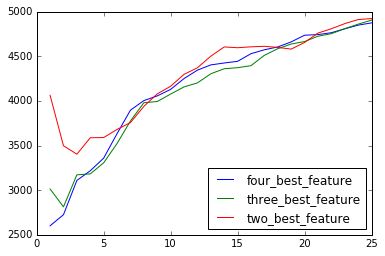

In [24]:
def knn_train_test(train_columns, target_columns, df):
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    rand_df = df.reindex(random_index)
    training_number = round(len(rand_df)/2)
    training_data = rand_df.iloc[0:training_number]
    test_data = rand_df.iloc[training_number:]
    k_rmse ={}
    k_value = [i for i in range(1,26)]
    for k in k_value:
        model = KNeighborsRegressor(n_neighbors =k)
        model.fit(training_data[train_columns],training_data[target_columns])
        predictions = model.predict(test_data[train_columns])
        mse = mean_squared_error(predictions, test_data[target_columns])
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse
RMSE ={}
two_best_feature = ['horsepower','width']
RMSE['two_best_feature'] = knn_train_test(two_best_feature,'price',cars)
three_best_feature = ['horsepower','width','curb-weight']
RMSE['three_best_feature'] = knn_train_test(three_best_feature,'price',cars)
four_best_feature = ['horsepower','width','curb-weight','highway-mpg']
RMSE['four_best_feature'] = knn_train_test(four_best_feature,'price',cars)
print(RMSE)
for k,v in RMSE.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y,label=k)
    plt.legend(loc=4)